In [0]:
import numpy as np 
import pandas as pd 

from keras.optimizers import SGD, Adam
import keras
from keras.models import Sequential
from keras.utils import to_categorical
from keras.layers import Dense, Dropout, Activation, Flatten, Conv2D, MaxPooling2D, Convolution2D

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import interpolate
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
pd.options.mode.chained_assignment = None
from scipy.interpolate import griddata

# Any results you write to the current directory are saved as output.
from google.colab import drive
drive.mount('/content/mydrive')

In [13]:
train_data = pd.read_csv('/content/mydrive/My Drive/DM_DATA/interpolated_train.csv')
test_data = pd.read_csv('/content/mydrive/My Drive/DM_DATA/interpolated_test.csv')
labels = train_data.pop('label')

KeyError: ignored

In [12]:
train_data]

,sparse_0,sparse_1,sparse_2,sparse_3,sparse_4,sparse_5,sparse_6,sparse_7,sparse_8,sparse_9,...,sparse_1014,sparse_1015,sparse_1016,sparse_1017,sparse_1018,sparse_1019,sparse_1020,sparse_1021,sparse_1022,sparse_1023
1393,255.0,255.000000,173.000000,175.000000,175.670644,175.000000,174.000000,174.000000,174.965465,175.865048,...,60.209787,51.000000,52.000000,50.000000,48.000000,48.542136,50.000000,50.895515,52.000000,255.0
1394,92.0,93.970379,95.829520,97.564376,99.161899,100.609042,101.892758,103.000000,104.000000,105.000000,...,121.000000,150.202853,181.000000,186.000000,174.000000,158.000000,150.000000,150.000000,141.715670,128.0
1395,255.0,255.000000,236.000000,177.000000,133.000000,114.599112,106.000000,90.375800,82.000000,97.263245,...,214.000000,217.000000,219.682298,219.000000,215.945465,214.000000,214.000000,213.750244,213.182741,212.0
1396,255.0,116.000000,114.000000,113.239704,115.392578,118.000000,118.000000,118.000000,119.812404,122.000000,...,139.000000,139.000000,140.178962,142.000000,143.436590,140.454395,126.000000,87.000000,37.000000,41.0
1397,251.0,249.357062,249.000000,255.367599,267.067100,275.782802,273.199003,251.000000,207.000000,209.000000,...,112.000000,112.000000,112.000000,112.000000,111.000000,109.390287,109.000000,109.806765,109.709363,108.0
1398,255.0,255.000000,132.000000,145.000000,139.785040,131.000000,131.406716,136.000000,139.960785,142.000000,...,151.000000,158.000000,164.000000,155.000000,159.000000,167.000000,255.000000,255.000000,255.000000,255.0
1399,188.0,176.000000,167.856132,162.520079,156.000000,151.610499,154.000000,158.000000,166.000000,174.462193,...,118.917647,139.000000,134.619124,130.000000,143.000000,141.422717,141.000000,157.000000,154.445995,141.0
1400,255.0,75.000000,73.560922,85.000000,94.841177,95.000000,100.643785,106.000000,104.814266,102.991607,...,102.645311,107.000000,113.886437,122.359824,130.689992,137.146773,140.000000,139.340854,137.000000,255.0
1401,255.0,255.000000,255.000000,85.000000,53.000000,46.000000,62.000000,72.362932,71.326601,62.876969,...,37.842928,41.000000,42.661249,34.399418,22.000000,26.000000,57.418945,76.000000,43.000000,255.0
1402,255.0,255.000000,255.000000,255.000000,120.000000,121.000000,122.000000,121.928242,121.843384,122.000000,...,166.981013,166.000000,165.000000,164.753708,165.134561,165.698132,166.000000,164.819381,164.000000,165.0


In [0]:
def imgShow(im):
    res = np.array(im).reshape(32,32)
    plt.imshow(res,interpolation='nearest', cmap = plt.cm.gray)

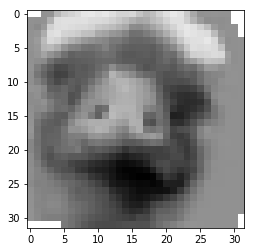

In [8]:
imgShow(train_data.iloc[1])

In [9]:
X_train, X_test, y_train, y_test = train_test_split(train_data, labels)

X_train = X_train.values.reshape(X_train.shape[0], 32, 32, 1)
X_test = X_test.values.reshape(X_test.shape[0], 32, 32, 1)
test = test_data.values.reshape(test_data.shape[0], 32, 32, 1)
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

NameError: ignored

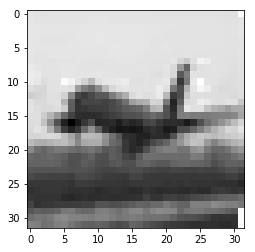

In [0]:
imgShow(Test_Final[1])

In [0]:
# Define the model
# model 2...
model = Sequential()
model.add(Convolution2D(48, 3, 3, border_mode='same', input_shape=(32, 32, 1)))
model.add(Activation('relu'))
model.add(Convolution2D(48, 3, 3))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Convolution2D(96, 3, 3, border_mode='same'))
model.add(Activation('relu'))
model.add(Convolution2D(96, 3, 3))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Convolution2D(192, 3, 3, border_mode='same'))
model.add(Activation('relu'))
model.add(Convolution2D(192, 3, 3))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(256))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))
# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(48, (3, 3), input_shape=(32, 32, 1..., padding="same")`
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(48, (3, 3))`
  after removing the cwd from sys.path.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(96, (3, 3), padding="same")`
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(96, (3, 3))`
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:14: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(192, (3, 3), padding="same")`
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:16: UserWarning: Update your `Conv2D` 

In [0]:
# build and compile the model  (roughly following the VGG paper)
import tensorflow as tf
import numpy as np                                
import matplotlib.pyplot as plt
from tensorflow.examples.tutorials.mnist import input_data
import keras as k
from keras.datasets import cifar10
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D, BatchNormalization
from keras.optimizers import SGD, Adam
from keras.regularizers import l2
import h5py
from keras.models import load_model
from keras.preprocessing.image import ImageDataGenerator
#reg=l2(1e-4)   # L2 or "ridge" regularisation
reg=None
num_filters=32
ac='relu'
adm=Adam(lr=0.001,decay=0, beta_1=0.9, beta_2=0.999, epsilon=1e-08)
opt=adm
drop_dense=0.5
drop_conv=0

model = Sequential()

model.add(Conv2D(num_filters, (3, 3), activation=ac, kernel_regularizer=reg, input_shape=(32, 32, 1),padding='same'))
model.add(BatchNormalization(axis=-1))
model.add(Conv2D(num_filters, (3, 3), activation=ac,kernel_regularizer=reg,padding='same'))
model.add(BatchNormalization(axis=-1))
model.add(MaxPooling2D(pool_size=(2, 2)))   # reduces to 16x16x3xnum_filters
model.add(Dropout(drop_conv))

model.add(Conv2D(2*num_filters, (3, 3), activation=ac,kernel_regularizer=reg,padding='same'))
model.add(BatchNormalization(axis=-1))
model.add(Conv2D(2*num_filters, (3, 3), activation=ac,kernel_regularizer=reg,padding='same'))
model.add(BatchNormalization(axis=-1))
model.add(MaxPooling2D(pool_size=(2, 2)))   # reduces to 8x8x3x(2*num_filters)
model.add(Dropout(drop_conv))

model.add(Conv2D(4*num_filters, (3, 3), activation=ac,kernel_regularizer=reg,padding='same'))
model.add(BatchNormalization(axis=-1))
model.add(Conv2D(4*num_filters, (3, 3), activation=ac,kernel_regularizer=reg,padding='same'))
model.add(BatchNormalization(axis=-1))
model.add(MaxPooling2D(pool_size=(2, 2)))   # reduces to 4x4x3x(4*num_filters)
model.add(Dropout(drop_conv))

model.add(Flatten())
model.add(Dense(512, activation=ac,kernel_regularizer=reg))
model.add(BatchNormalization())
model.add(Dropout(drop_dense))
model.add(Dense(10, activation='softmax'))

model.compile(loss='categorical_crossentropy', metrics=['accuracy'],optimizer=opt)

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [0]:
# model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [0]:
model.fit(X_train, y_train,batch_size=128, epochs=100, validation_data=(X_test, y_test))

Train on 36375 samples, validate on 12125 samples
Epoch 1/100
36375/36375 [==============================] - 10s 262us/step - loss: 2.3038 - acc: 0.1468 - val_loss: 2.0256 - val_acc: 0.2633
Epoch 2/100
36375/36375 [==============================] - 8s 216us/step - loss: 1.9386 - acc: 0.2807 - val_loss: 1.8299 - val_acc: 0.3191
Epoch 3/100
36375/36375 [==============================] - 8s 217us/step - loss: 1.7969 - acc: 0.3483 - val_loss: 1.6582 - val_acc: 0.4068
Epoch 4/100
36375/36375 [==============================] - 8s 218us/step - loss: 1.6821 - acc: 0.4111 - val_loss: 1.5071 - val_acc: 0.4896
Epoch 5/100
36375/36375 [==============================] - 8s 217us/step - loss: 1.5714 - acc: 0.4617 - val_loss: 1.4439 - val_acc: 0.5162
Epoch 6/100
36375/36375 [==============================] - 8s 221us/step - loss: 1.4955 - acc: 0.4973 - val_loss: 1.4140 - val_acc: 0.5260
Epoch 7/100
36375/36375 [==============================] - 8s 221us/step - loss: 1.4371 - acc: 0.5205 - val_loss: 1

In [0]:
test_final = test.values.reshape(test.shape[0], 32, 32, 1)

In [0]:
res = model.predict_classes(test_final)

In [0]:
read

,id,label
0,0,6
1,1,0
2,2,1
3,3,4
4,4,6
5,5,7
6,6,3
7,7,4
8,8,2
9,9,4


In [0]:
read = pd.read_csv('/content/mydrive/My Drive/DM_DATA/sample.csv')
read['label'] = res

In [0]:
read.to_csv('/content/mydrive/My Drive/DM_DATA/submission_model2.csv',index=False)